In [27]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import TUDataset

In [34]:
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
from torch_geometric.utils import scatter

In [2]:
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

Processing...
Done!


In [4]:
len(dataset)

600

In [5]:
dataset.num_classes

6

In [6]:
dataset.num_node_features

3

In [7]:
# for example
data0 = dataset[0]
print(data0)

Data(edge_index=[2, 168], x=[37, 3], y=[1])


In [8]:
data0.num_node_features

3

In [10]:
data0.is_undirected()

True

In [11]:
for key, item in data0:
    print(f'{key} found in data')

edge_index found in data
x found in data
y found in data


In [12]:
print(data0['x'])

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])


In [13]:
print(data0['y'])

tensor([5])


In [14]:
print(data0['edge_index'])

tensor([[ 0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
          3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12,
         12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16,
         16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 20,
         21, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25,
         25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28,
         28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 32,
         32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35,
         35, 35, 36, 36, 36, 36],
        [ 1,  2,  3,  0,  2,  3, 24, 27,  0,  1,  3, 27, 28,  0,  1,  2,  4,  5,
         28,  3,  5,  6, 29,  3,  4,  6,  7, 29,  4,  5,  7,  8,  5,  6,  8,  9,
         10,  6,  7,  9,  7,  8, 10, 11, 12,  7,  9, 11, 12,  9, 10, 12, 26

In [19]:
# convert to networkx
G = to_networkx(data0, to_undirected=True)

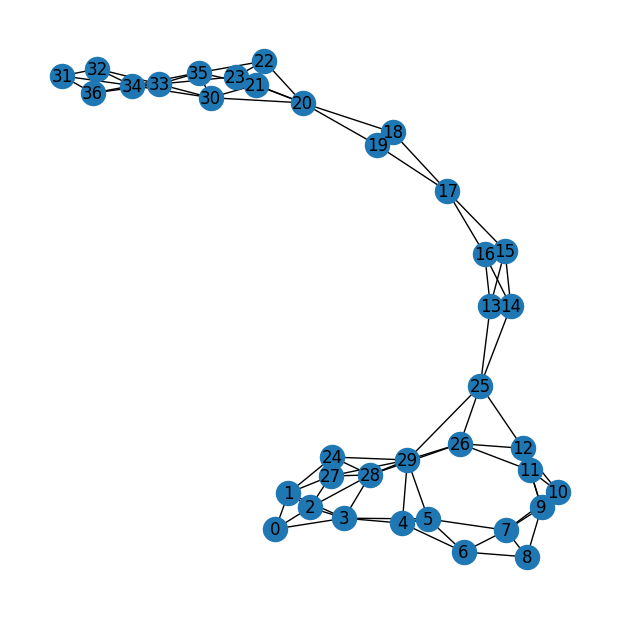

In [25]:
# plot nwx graph
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [26]:
# slices (e.g. for train/test)
dataset = dataset.shuffle()
train_dataset = dataset[:540]
test_dataset = dataset[540:]

In [28]:
# continuing with data loader
# from torch_geometric.loader import DataLoader

loader = DataLoader(dataset, batch_size = 32, shuffle = True)

In [ ]:
for batch in loader:
    print(batch)

In [ ]:
for batch in loader:
    print(batch.num_graphs)

In [ ]:
for batch in loader:
    print(batch['batch'])

In [ ]:
for qb in loader:
    x = scatter(qb.x, qb.batch, dim=0, reduce='mean')
    print(x.size())

In [ ]:
for qb in loader:
    print(qb.x)